# K-Means Cluster Analysis: Aggregated Tree Census Data 

#### Variables included in the clustering were selected in part due to relationships found during data exploration. 

Load packages and data. 

In [1]:
library(cluster)
library(factoextra)
library(ggplot2)

#setwd("C:/Users/ear51/DAAN- Graduate School/Other Projects/Trees/Processed Data Files")
agg_data <- read.csv("Joined_aggregate_data.csv")

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Create a function to summarize the average of each attribute per cluster. Also, create a function that will scale the column values to have a range between 0 and 1.  

In [2]:
seg.summ <- function(data, groups) {
  aggregate(data, list(groups), function(x) mean(as.numeric(x)))
}
            
normalize <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

Create list of numerical variables to be used in cluster analysis. 

In [3]:
num_vars <- c("Trees_x_sq_mi", "SelfEmployed", "MeanCommute", "Drive", "Carpool", "IncomePerCap", "PrivateWork")
data_num <- agg_data[, num_vars]
data_num <- data_num[complete.cases(data_num), ]
data_num <- sapply(data_num, normalize)

summary(data_num)

 Trees_x_sq_mi     SelfEmployed     MeanCommute         Drive       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3119   1st Qu.:0.2632   1st Qu.:0.4504   1st Qu.:0.1395  
 Median :0.3989   Median :0.3607   Median :0.5600   Median :0.2826  
 Mean   :0.4050   Mean   :0.3887   Mean   :0.5434   Mean   :0.3611  
 3rd Qu.:0.5083   3rd Qu.:0.4976   3rd Qu.:0.6634   3rd Qu.:0.5479  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    Carpool        IncomePerCap     PrivateWork    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1474   1st Qu.:0.0671   1st Qu.:0.4390  
 Median :0.2617   Median :0.1013   Median :0.5593  
 Mean   :0.2949   Mean   :0.1436   Mean   :0.5578  
 3rd Qu.:0.3913   3rd Qu.:0.1619   3rd Qu.:0.6691  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

### Calculate number of clusters needed for optimal model. 

#### First, we use the "elbow" method to identify the number of clusters

Unsupervised partitioning techniques seek to minimize the intra-cluster differences to group together similar records (within-cluster sum of square (WSS). We want to minimize the WSS measures to find the most compact clusters.

The optimal number of clusters occurs when adding another cluster doesn’t drastically improve the total WSS.The location of a bend (hence the name "elbow") in the plot is an indicator of the appropriate number of clusters - where additional clusters have marginally little benefit to the WSS.

Based on the elbow method, we could expect the optimal number of clusters to be around 3 or 4. 

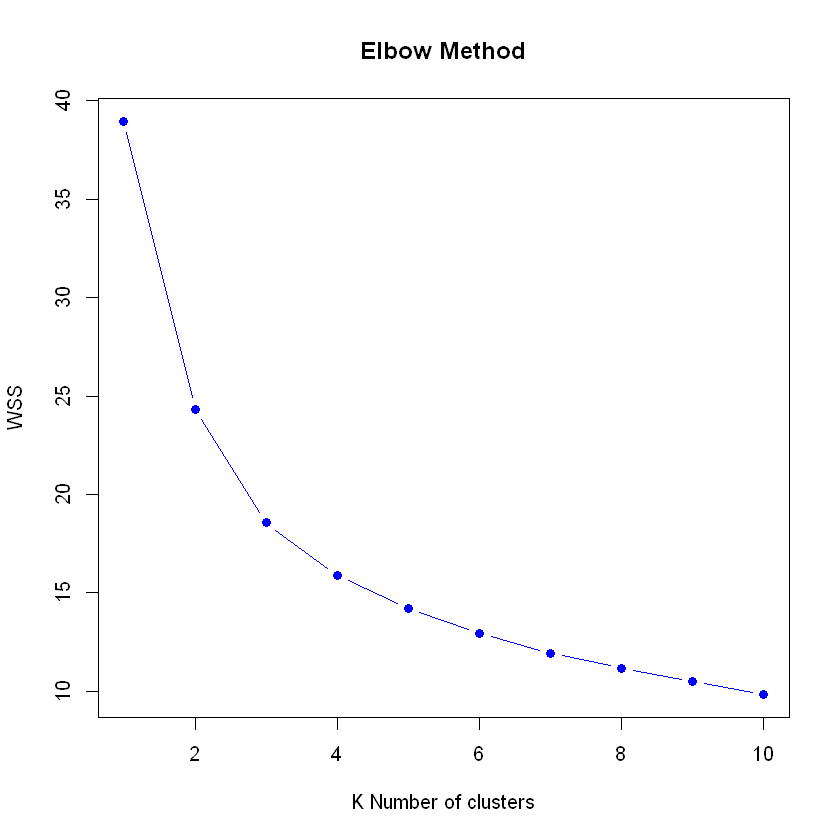

In [4]:
set.seed(1811)
k.max <- 10
data <- data_num
wss <- sapply(1:k.max, 
              function(k){kmeans(data, k, nstart=50,iter.max = 15 )$tot.withinss})
plot(1:k.max, wss, pch = 19, type = "b", col="blue",
     xlab="K Number of clusters", ylab = "WSS", main="Elbow Method")


#### Bayesian Inference Criteron to find best "K"

This technique finds the optimal number of clusters according to the Bayesian Information Criterion (BIC). The best model selected was EVI (Equal Volume but Variable shape and using Identity Matrix for the eigen values) with number of clusters 3 and 3. 
We also checked for the BIC and it seems to validate the findings of Mclust package showing that cluster choices of 3 and 4 are the overall best and of highest value for this distribution of data.

So based on this and the previous method the natural number of clusters choice was indicating 3 or 4.

Warning message:
"package 'mclust' was built under R version 3.6.3"Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.


Bayesian Information Criterion (BIC): 
        EII      VII       EEI       VEI       EVI       VVI       EEE
1  489.9603 489.9603  553.5182  553.5182  553.5182  553.5182  919.6333
2  761.8989 631.3157  753.1259  814.4295 1012.0884 1011.7538  925.0423
3  924.8281 940.7688  950.5834  978.8527 1125.5976 1131.5775 1069.5324
4  961.1666 971.0672  999.1114 1009.2742 1120.3037 1134.8747 1076.6223
5  973.7709 969.2302 1031.7253 1046.1550 1132.0130 1145.0570 1080.1657
6  989.9356 971.8879 1019.4145 1065.2244 1147.9677 1109.5558 1058.0150
7  983.5784 979.6710 1055.3476 1079.6298 1155.1958 1124.9560 1053.8028
8  962.7871 965.9993 1025.7295 1068.7382 1107.4588 1091.6254 1058.1734
9  939.4376 969.6855 1025.2618 1065.1325 1067.9042 1046.4685 1058.3308
10 948.0863 954.1059 1022.3971 1053.8220 1054.1525  994.0794 1037.9429
         EVE       VEE       VVE       EEV       VEV       EVV       VVV
1   919.6333  919.6333  919.6333  919.6333  919.6333  919.6333  919.6333
2  1225.6993  988.4296  989.1718 1

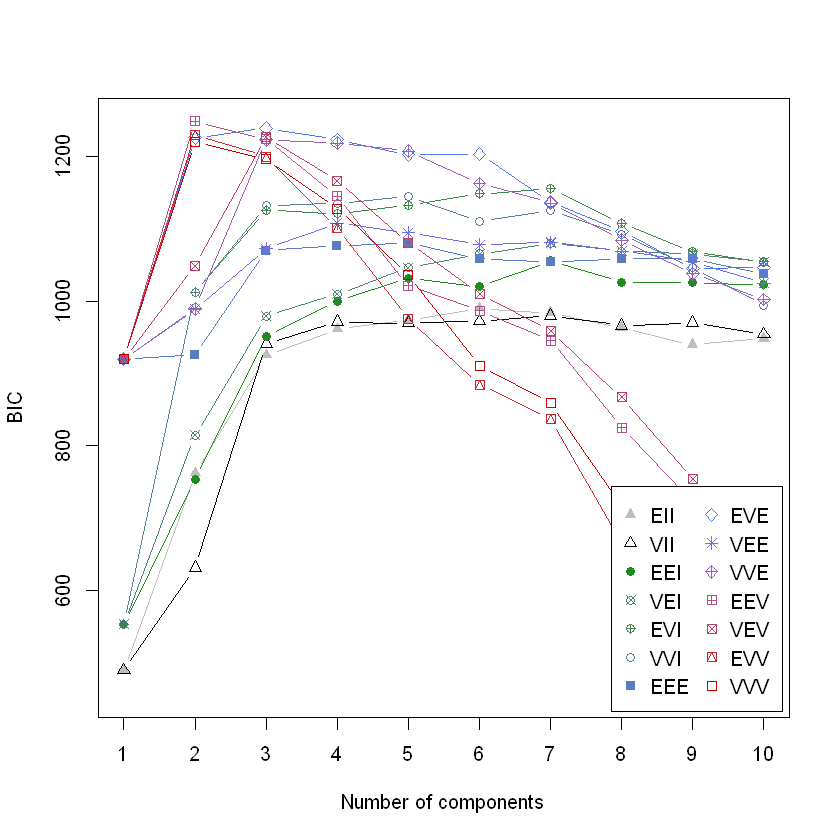

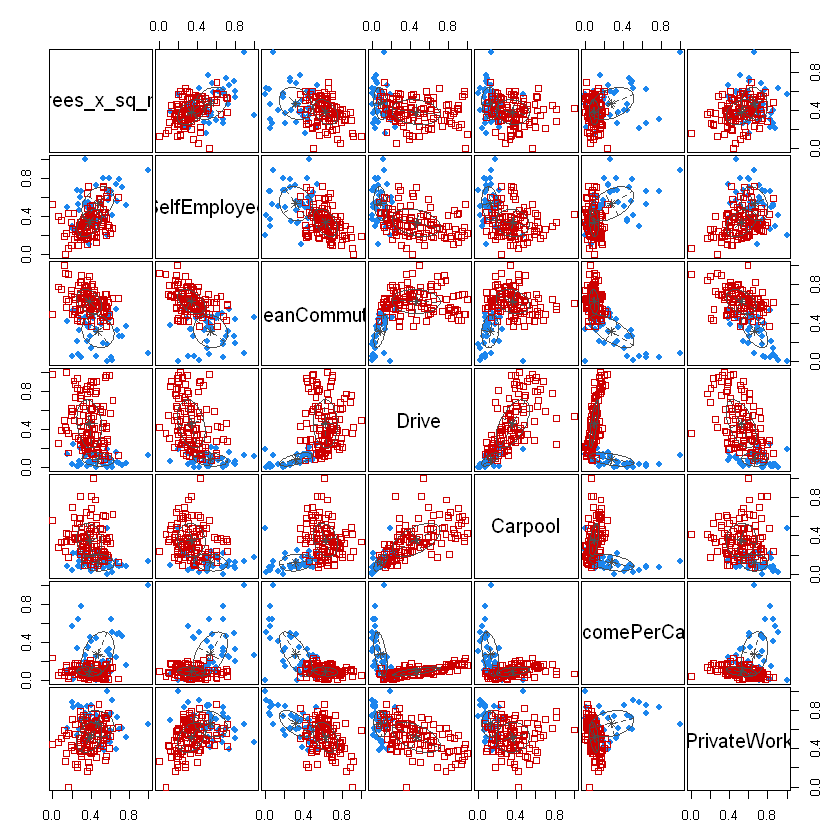

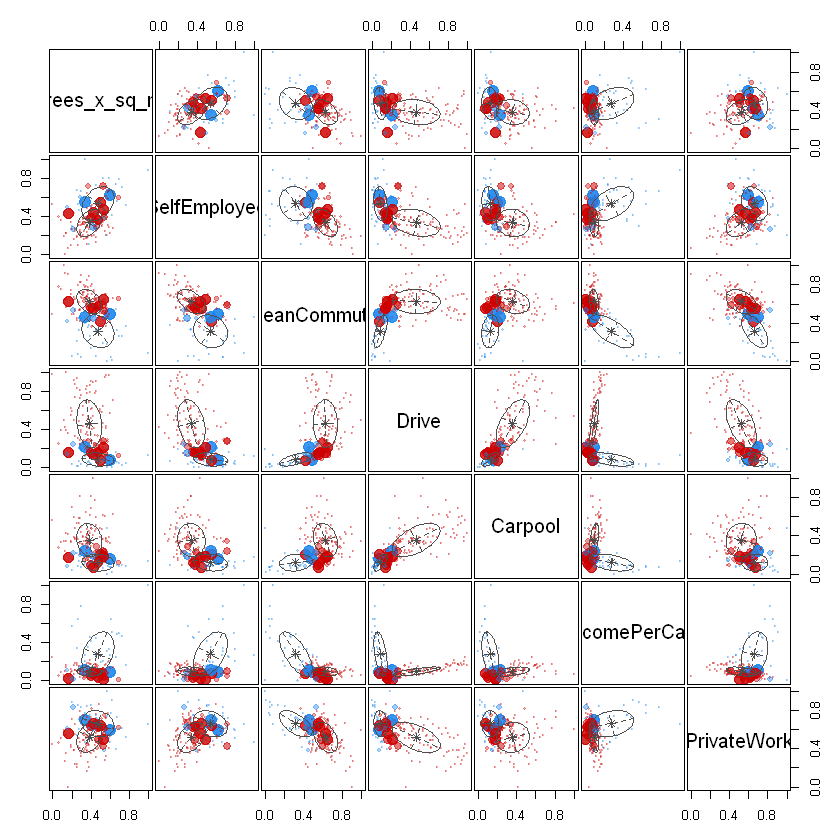

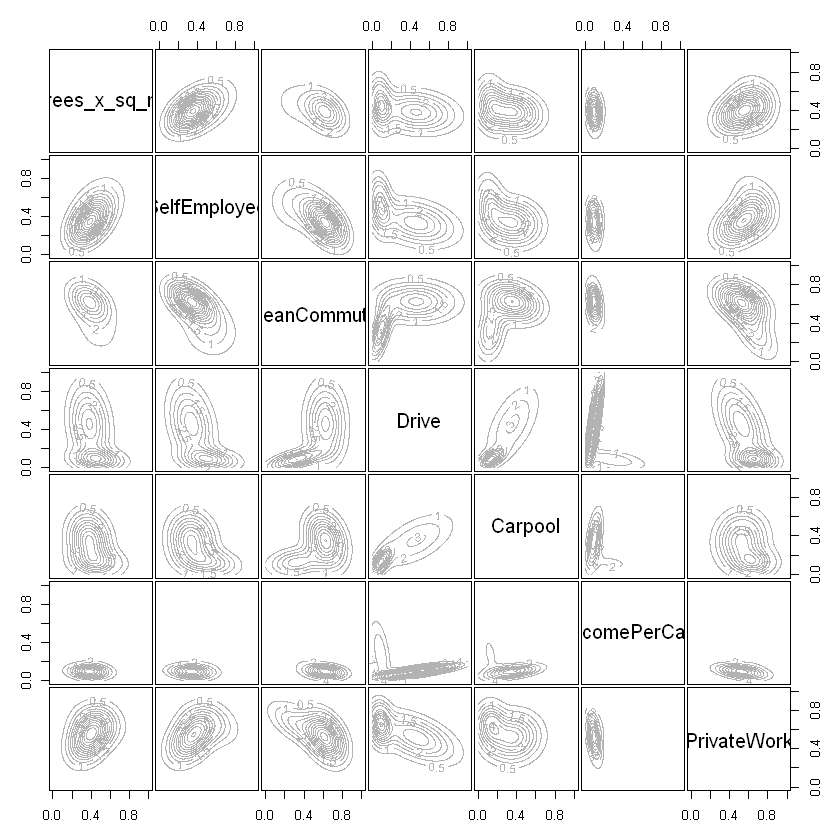

In [5]:
library(mclust)

d_clust <- Mclust(as.matrix(data_num), G=1:10, 
                  modelNames = mclust.options("emModelNames"))
d_clust$BIC
plot(d_clust)

#### Deciding between 3 or 4 clusters

NbClust package provides 30 indices for determining the number of clusters and proposes to user the best clustering scheme from the different results obtained by varying all combinations of number of clusters, distance measures, and clustering methods.

Based on the output, 3 is the optimal number of clusters. 

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


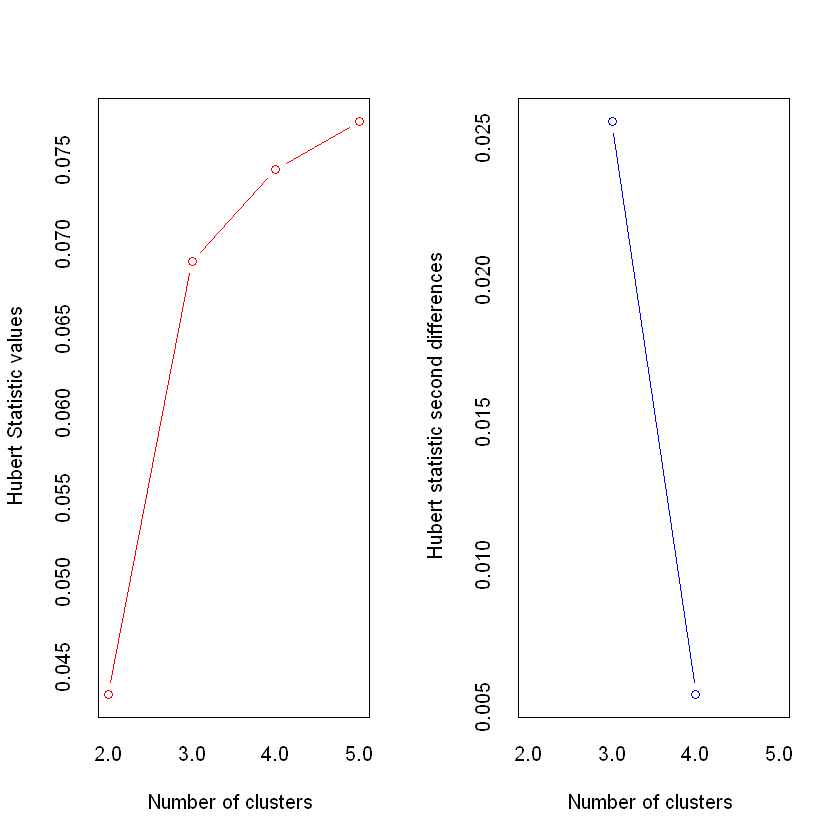

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 2 as the best number of clusters 
* 12 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


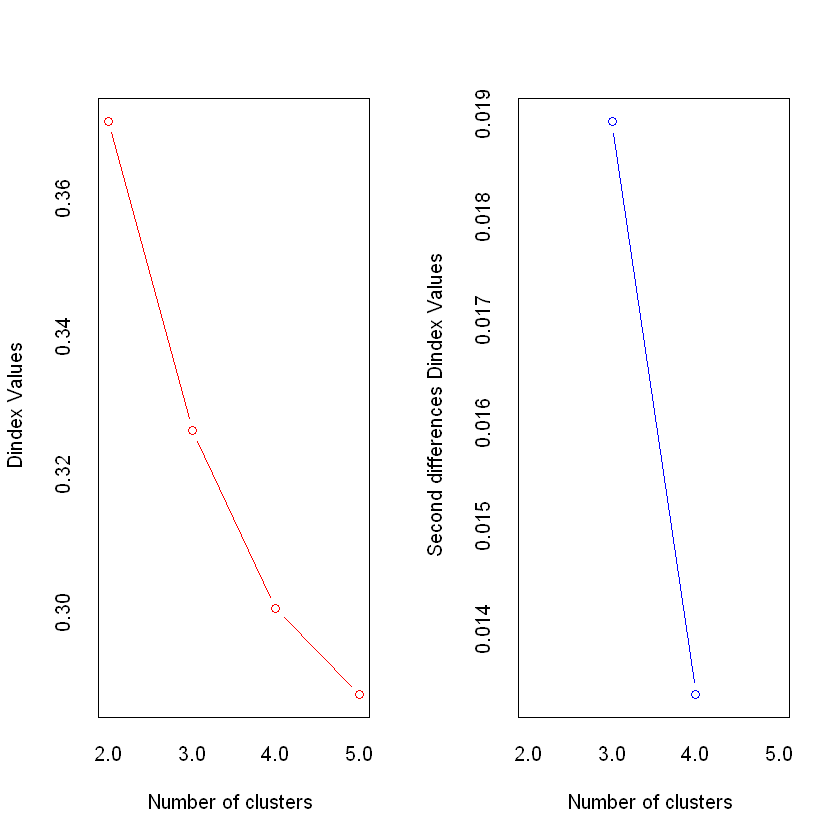

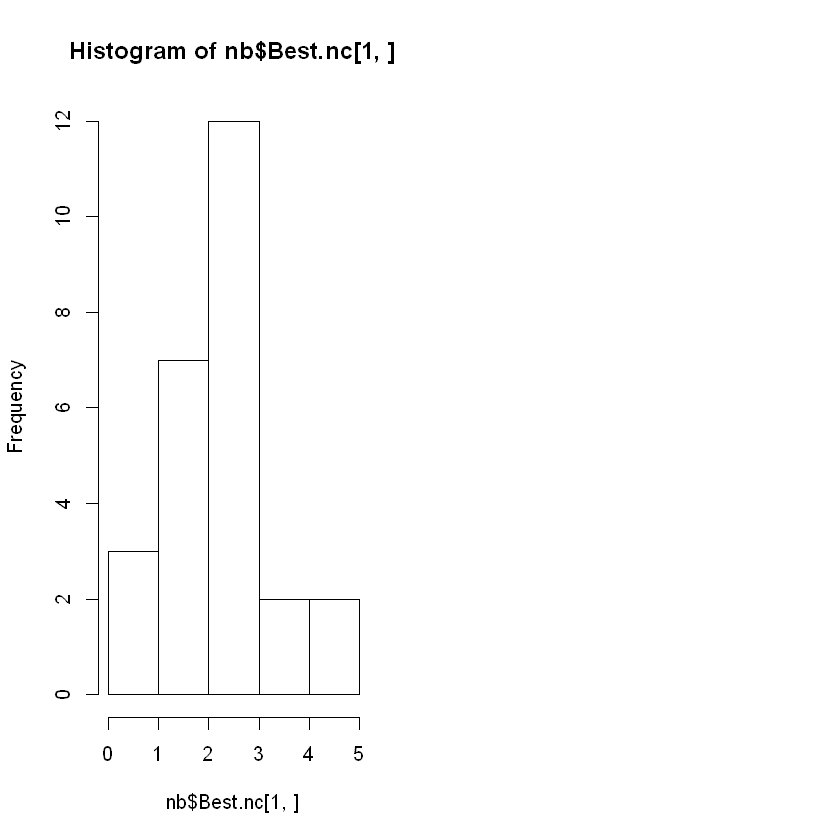

In [6]:
library(NbClust)
nb <- NbClust(data_num, diss=NULL, distance = "euclidean", 
              min.nc=2, max.nc=5, method = "kmeans", 
              index = "all", alphaBeale = 0.1)
hist(nb$Best.nc[1,], breaks = max(na.omit(nb$Best.nc[1,])))

### Build the model using K = 3

In [7]:
seg.k <- kmeans(data_num, centers=3, iter.max = 10)
seg.k$size # gives no. of records in each cluster

[1] 26 49 80

In [8]:
seg.summ(data_num, seg.k$cluster)

Group.1,Trees_x_sq_mi,SelfEmployed,MeanCommute,Drive,Carpool,IncomePerCap,PrivateWork
1,0.5130381,0.6151614,0.2524894,0.05648323,0.09113046,0.39705359,0.6634629
2,0.3529350,0.2728829,0.6408978,0.70602829,0.46232804,0.12527124,0.4258633
3,0.4017281,0.3859889,0.5781858,0.24882226,0.25848105,0.07253185,0.6042194


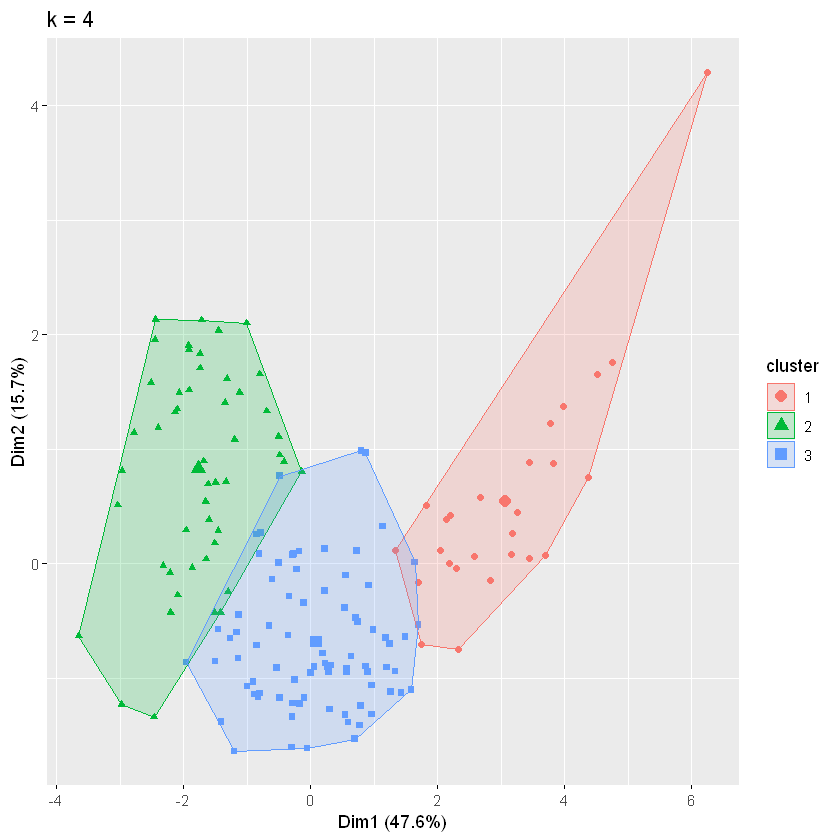

In [9]:
fviz_cluster(seg.k, geom = "point",  data = data_num) + ggtitle("k = 4")

## Conclusions

A cluster is simply a group of similar objects. Clustering analyses allow us to sort through data and use the resulting clusters to discover information, patterns, etc. about the data. 

Objects in the cluster should be as similar as possible. While objects in different clusters should be as different as possible. 

Based on the output, we can see the optimal number of distinct hard clusters is 3. We can see that:
 - Group 1 is comprised of relatively more self/priavtely-employed, higher-income, and less frequently travelling people. This group has the highest tree density in their area. 
 - Group 2 has the lowest tree density and also is comprised of relatively more frequently travelling people and lower-income. 
 - Group 3 also has a low tree density, relatively more privately working people and has the lowest income level across the clusters.

